In [188]:
import skmine
print("This tutorial was tested with the following version of skmine :", skmine.__version__)

This tutorial was tested with the following version of skmine : 0.0.9


# Table of Contents

* [Chapter 1 Classify Iris Dataset-3 Class](#chapter1)
    * [Section 1 Original Dataset](#section_1)
    * [Section 2 Discretization](#section_2)
    * [Section 2 Classification OneVsRest](#section_3)]
        * [Section 1.2.1](#section_1_2_1)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)


# Chapter 1 Classify Iris Dataset-3 Class <a class="anchor" id="chapter1"></a>


In [189]:
import skmine
print("This tutorial was tested with the following version of skmine :", skmine.__version__)

This tutorial was tested with the following version of skmine : 0.0.9


 ## Section 1: Original dataset <a class="anchor" id="section_1"></a>

In [204]:
from sklearn.datasets import load_iris
import pandas as pd

iris  = load_iris(as_frame=True)
print("Target: \n", *list(enumerate(iris.target_names)),sep='\n')
iris.frame

Target: 

(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [191]:
import plotly.express as px
fig = px.scatter_3d(iris.frame, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
              color='target', labels={'target':'target'},
              title="Iris Dataset in 3D",)
fig.update_traces(marker_size = 3)
fig.show()


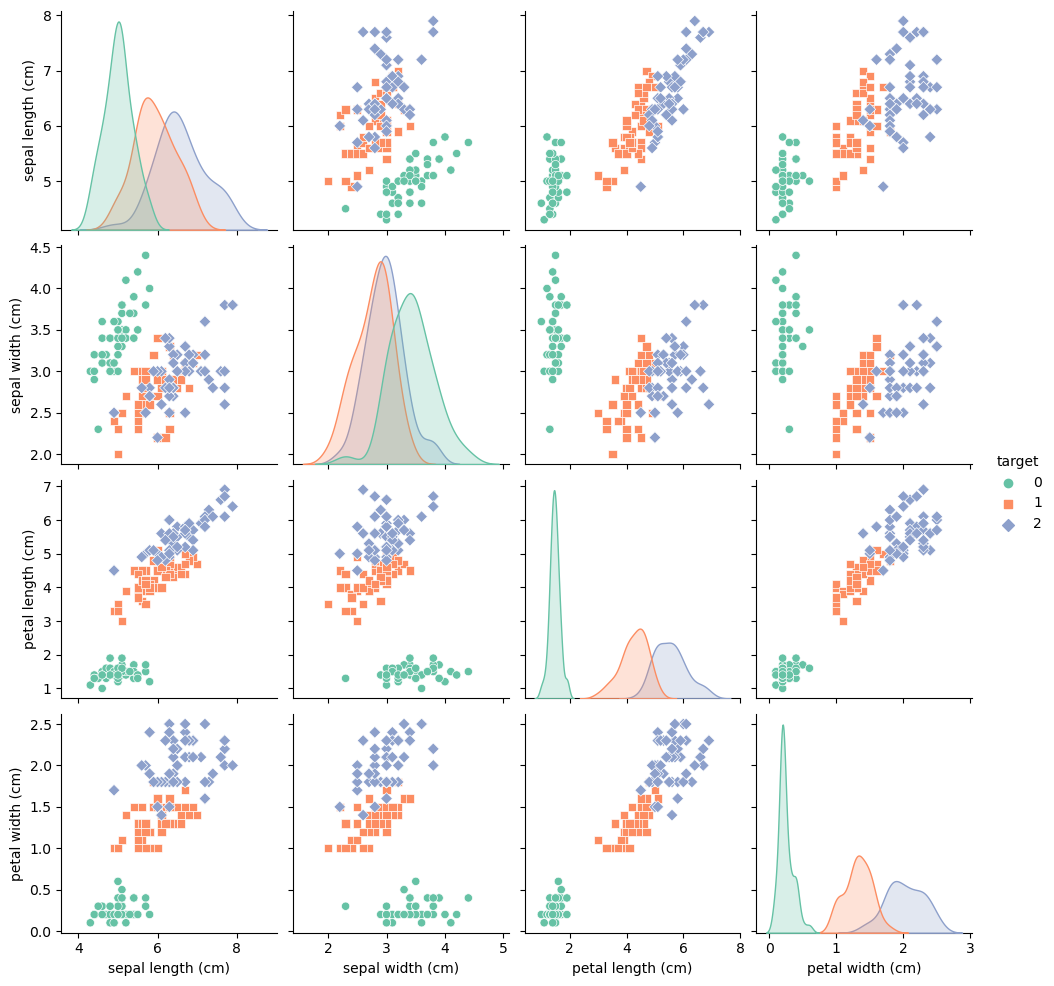

In [192]:
import seaborn as sns
sns.pairplot(iris.frame, kind="scatter", hue="target", markers=["o", "s", "D"], palette="Set2")
plt.show()

 ## Section 2: Discretization with Sklearn <a class="anchor" id="section_2"></a>

In [193]:
from sklearn.preprocessing import KBinsDiscretizer



In [194]:
nbins = 10 
est = KBinsDiscretizer(n_bins=nbins, encode='ordinal', strategy="uniform").set_output(transform='pandas')
iris_discret = est.fit_transform(iris.frame)
iris_discret.astype(int)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,2,6,0,0,0
1,1,4,0,0,0
2,1,5,0,0,0
3,0,4,0,0,0
4,1,6,0,0,0
...,...,...,...,...,...
145,6,4,7,9,9
146,5,2,6,7,9
147,6,4,7,7,9
148,5,5,7,9,9


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>,
        <AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>,
        <AxesSubplot:>]], dtype=object)

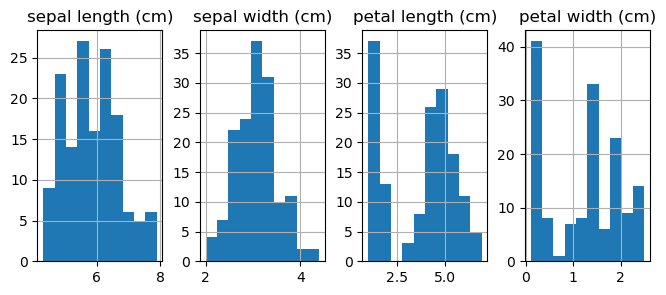

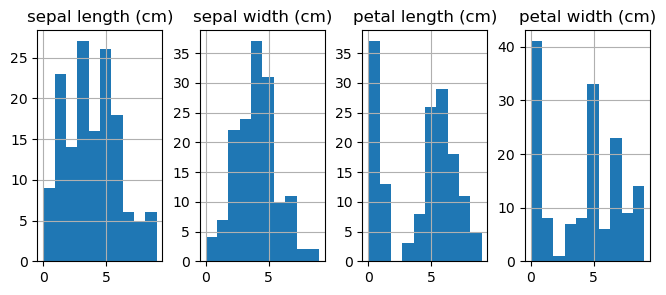

In [202]:
iris.frame.drop(columns='target').hist(layout=(1,5),figsize=(10,3))
iris_discret.drop(columns='target').hist(layout=(1,5),figsize=(10,3))

In [196]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris.frame, test_size=0.2, shuffle=True, random_state=1)
X_train, y_train = train.iloc[:,:3], train['target']
X_test, y_test = test.iloc[:,:3], test['target']


 ## Section 2: Classification with SLIM <a class="anchor" id="section_2"></a>

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from skmine.itemsets import SLIM
clf = Pipeline([
    ('discretizer', KBinsDiscretizer(n_bins=nbins, encode='onehot', strategy='quantile')),
    ('OvRslim',  OneVsRestClassifier(SLIM()))
])

In [198]:
# training pipeline
clf.fit(X_train, y_train)


Pipeline(steps=[('discretizer', KBinsDiscretizer(n_bins=10)),
                ('OvRslim', OneVsRestClassifier(estimator=SLIM()))])

In [201]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
print(f"Validation accuracy :{round(clf.score(X_test, y_test) * 100,1)} %")
print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns=iris.target_names, index=iris.target_names))

Validation accuracy :93.3 %
            setosa  versicolor  virginica
setosa          11           0          0
versicolor       1          11          1
virginica        0           0          6
